<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Iris_Dataset_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [27]:
# Load Data
df = datasets.load_iris()

X, y = df.data, df.target

In [28]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [29]:
scaler = StandardScaler().fit(X)

In [30]:
X = scaler.transform(X)

print(np.min(X), np.max(X))

-2.43394714190809 3.0907752482994253


In [31]:
y = tf.keras.utils.to_categorical(y, 3)

In [32]:
print(y.shape)

(150, 3)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [35]:
num_classes = 3

model = Sequential()
model.add(Dense(128, input_shape=(4,), name='Hidden-Layer-1', activation='relu'))
model.add(Dense(128, name='Hidden-Layer-2', activation='relu'))
model.add(Dense(num_classes, name='Output-Layer', activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


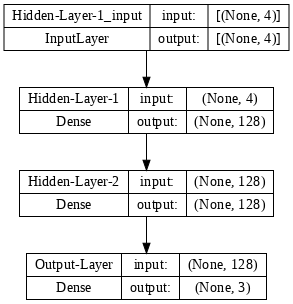

In [36]:
tf.keras.utils.plot_model(model=model, dpi=72, show_shapes=True)

In [37]:
batch_size = 16
epochs = 10
validation_split = 0.2
verbose = 1

history = model.fit(X_train, 
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose,
                    validation_split=validation_split)

Epoch 1/10
6/6 [==============================] - 1s 41ms/step - loss: 0.8830 - accuracy: 0.6979 - val_loss: 0.7898 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6298 - accuracy: 0.8229 - val_loss: 0.6327 - val_accuracy: 0.7917
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.4857 - accuracy: 0.8229 - val_loss: 0.5343 - val_accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.8542 - val_loss: 0.4822 - val_accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.3362 - accuracy: 0.8646 - val_loss: 0.4476 - val_accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2946 - accuracy: 0.8646 - val_loss: 0.4219 - val_accuracy: 0.8333
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.8958 - val_loss: 0.4027 - val_accuracy: 0.8333
Epoch 8/10
6/6 [=================

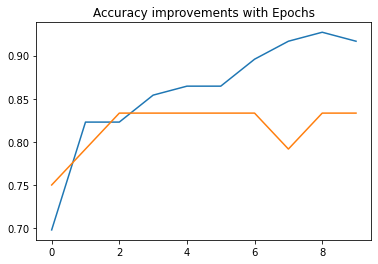

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy improvements with Epochs')
plt.show()

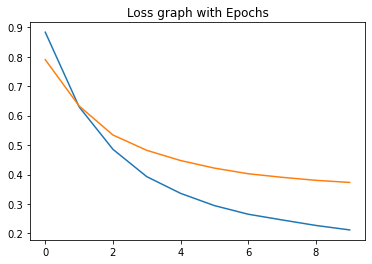

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph with Epochs')
plt.show()